In [1]:
# install these libraries if you don't already have them
# !pip install facebook_scraper
# !pip install vaderSentiment
# !pip install openpyxl

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
from collections.abc import Iterable
from facebook_scraper import get_posts 
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS
import spacy
from spacy.matcher import PhraseMatcher
import statsmodels.api as sm

In [2]:
listposts = []

for post in get_posts('primelands', cookies="/Users/kelumrubasin/Desktop/MSC_DATA_SCIENCE/1_Social_Media_Analytics/Assignment_CIS7029/facebook_data/facebook.com_cookies.txt",
                      pages=50,
                      options={'comments': True}):
    listposts.append(post)
    
print('Number of posts: {}'.format(len(listposts)))   

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/facebook_scraper/facebook_scraper.py:881: UserWarning: Facebook says 'Unsupported Browser'
  warnings.warn(f"Facebook says 'Unsupported Browser'")
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/dateparser/freshness_date_parser.py:76: PytzUsageWarning: The localize method is no longer necessary, as this time zone supports the fold attribute (PEP 495). For more details on migrating to a PEP 495-compliant implementation, see https://pytz-deprecation-shim.readthedocs.io/en/latest/migration.html
  now = self.get_local_tz().localize(now)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/dateparser/date_parser.py:35: PytzUsageWarning: The localize method is no longer necessary, as this time zone supports the fold attribute (PEP 495). For more details on migrating to a PEP 495-compliant implementation, see https://pytz-deprecation-shim.readthedocs.io/en

Number of posts: 198


In [3]:
columns = ['post_id', 
           'time',  
           'text', 
           'likes',
           'comments', 
           'shares', 
           'comments_full']

df_posts = pd.DataFrame(listposts)[columns]

In [4]:
df_posts['text'].replace('', np.nan, inplace=True)
df_posts.dropna(subset=['text'], inplace=True)
df_posts

,post_id,time,text,likes,comments,shares,comments_full
0,10160184885147290,2022-07-22 13:36:16,අනුරාධපුර - පුත්තලම පාරට මුහුණලා අගනා නේවාසික ...,238,2,1,"[{'comment_id': '388702613246944', 'comment_ur..."
1,10160184882127290,2022-07-22 13:33:03,සුන්දර වෙල්යායකට මුහුණලා අනුරාධපුරෙන් අගනා බිම...,192,6,0,"[{'comment_id': '1025783138104225', 'comment_u..."
2,10160184880962290,2022-07-22 13:31:30,දඹුල්ල මහ නගරසභා සීමාවෙන් වටිනා බිම් කොටස්\n👉 ...,134,5,3,"[{'comment_id': '1891518234391123', 'comment_u..."
3,10160184877312290,2022-07-22 13:27:39,මුලු ඉඩමම ලක්ෂ 15කට නාරම්මල හොඳම තැනකින්!!!\n📲...,162,3,1,"[{'comment_id': '1389563371566531', 'comment_u..."
4,10160183726687290,2022-07-21 19:49:52,අහංගම - ඉමදූව බස් පාරට මුහුණලා අගනා බිම් කොටස්...,249,4,11,"[{'comment_id': '379629477616441', 'comment_ur..."
...,...,...,...,...,...,...,...
193,10160045127092290,2022-05-06 14:29:05,Are You Planning to Buy a Land?\n👉 We Love to ...,5200,28,12,[]
194,10160043495567290,2022-05-05 18:38:16,"""සිහින දකින්න ඕනේ, දැකලා විතරක් මදි, ඒවා සැබෑ ...",194,8,58,[]
195,10160043475707290,2022-05-05 18:11:45,Prime Group crowned ‘Most Valuable Real Estate...,3300,15,30,[]
196,10160041694222290,2022-05-04 20:03:50,කළුතර හැම දේටම ලඟ හොඳම තැනකින් සුපිරි බිම් කොට...,919,29,11,[]


In [5]:
from langdetect import detect

def detect_en(text):
    try:
        return detect(text) == 'en'
    except:
        return False

df_posts = df_posts[df_posts['text'].apply(detect_en)]
df_posts

,post_id,time,text,likes,comments,shares,comments_full
1,10160184882127290,2022-07-22 13:33:03,සුන්දර වෙල්යායකට මුහුණලා අනුරාධපුරෙන් අගනා බිම...,192,6,0,"[{'comment_id': '1025783138104225', 'comment_u..."
3,10160184877312290,2022-07-22 13:27:39,මුලු ඉඩමම ලක්ෂ 15කට නාරම්මල හොඳම තැනකින්!!!\n📲...,162,3,1,"[{'comment_id': '1389563371566531', 'comment_u..."
4,10160183726687290,2022-07-21 19:49:52,අහංගම - ඉමදූව බස් පාරට මුහුණලා අගනා බිම් කොටස්...,249,4,11,"[{'comment_id': '379629477616441', 'comment_ur..."
8,10160183688187290,2022-07-21 19:15:16,Precious Land Plots from Nuwara Eliya\n👉 With ...,699,14,2,"[{'comment_id': '398970432214847', 'comment_ur..."
10,10160183673807290,2022-07-21 18:58:16,පානදුර Town එක ලඟින්ම සුපිරි බිම් කොටස්\n👉 පාන...,95,6,2,[]
...,...,...,...,...,...,...,...
188,10160050719542290,2022-05-09 13:07:06,Enjoy the Self-satisfaction of Having the Harv...,23,23,2,[]
191,10160048425947290,2022-05-08 09:54:58,Warm Wishes from Prime Group to All The Strong...,46,8,10,[]
192,10160046811607290,2022-05-07 12:18:38,Prime Group Wins Global...!!!\nPrime Group Won...,47,10,14,[]
193,10160045127092290,2022-05-06 14:29:05,Are You Planning to Buy a Land?\n👉 We Love to ...,5200,28,12,[]


In [6]:
analyzer = SentimentIntensityAnalyzer()

list_comments = []
for index, row in df_posts.iterrows():
    post_id = row['post_id']
    if isinstance(row['comments_full'], Iterable):
        for comment in row['comments_full']:
            dict_temp = {}
            dict_temp['post_id'] = post_id
            dict_temp['comment'] = comment['comment_text']
            dict_temp['sentiment'] = analyzer.polarity_scores(
                comment['comment_text'])['compound']
            list_comments.append(dict_temp)        

df_comments = pd.DataFrame(list_comments)


In [7]:
from langdetect import detect

def detect_en(text):
    try:
        return detect(text) == 'en'
    except:
        return False

df_comments = df_comments[df_comments['comment'].apply(detect_en)]
df_comments

,post_id,comment,sentiment
2,10160184882127290,Price please,0.3182
3,10160184882127290,Price please,0.3182
9,10160183688187290,Details please,0.3182
10,10160183688187290,deatails please,0.3182
12,10160183688187290,Price please,0.3182


In [8]:
df_comments['comment'].replace('', np.nan, inplace=True)
df_comments.dropna(subset=['comment'], inplace=True)

In [9]:
from langdetect import detect

def detect_en(text):
    try:
        return detect(text) == 'en'
    except:
        return False

df_comments = df_comments[df_comments['comment'].apply(detect_en)]
df_comments

,post_id,comment,sentiment
2,10160184882127290,Price please,0.3182
3,10160184882127290,Price please,0.3182
9,10160183688187290,Details please,0.3182
10,10160183688187290,deatails please,0.3182
12,10160183688187290,Price please,0.3182


In [10]:
posts_sentiment = df_comments.groupby('post_id').mean()

df_posts = df_posts.join(posts_sentiment, on=['post_id'])

df_posts.drop(columns=['comments_full'], inplace=True)
df_posts.fillna(0.0, inplace=True)

with pd.ExcelWriter('PrimeLands.xlsx') as writer:
    df_posts.to_excel(writer, sheet_name='posts_data', index_label='ID')
    df_comments.to_excel(writer, sheet_name='posts_comments', index_label='ID')
    

In [11]:
# Load data from exisiting files to save time
df_posts = pd.read_excel('PrimeLands.xlsx', sheet_name='posts_data')
df_comments = pd.read_excel('PrimeLands.xlsx', sheet_name='posts_comments')

In [12]:
# print out dataframe for posts 
df_posts.head()

,ID,post_id,time,text,likes,comments,shares,sentiment
0,1,10160184882127290,2022-07-22 13:33:03,සුන්දර වෙල්යායකට මුහුණලා අනුරාධපුරෙන් අගනා බිම...,192,6,0,0.3182
1,3,10160184877312290,2022-07-22 13:27:39,මුලු ඉඩමම ලක්ෂ 15කට නාරම්මල හොඳම තැනකින්!!!\n📲...,162,3,1,0.0000
2,4,10160183726687290,2022-07-21 19:49:52,අහංගම - ඉමදූව බස් පාරට මුහුණලා අගනා බිම් කොටස්...,249,4,11,0.0000
3,8,10160183688187290,2022-07-21 19:15:16,Precious Land Plots from Nuwara Eliya\n👉 With ...,699,14,2,0.3182
4,10,10160183673807290,2022-07-21 18:58:16,පානදුර Town එක ලඟින්ම සුපිරි බිම් කොටස්\n👉 පාන...,95,6,2,0.0000


In [13]:
# print out dataframe for comments 
df_comments.head()

,ID,post_id,comment,sentiment
0,2,10160184882127290,Price please,0.3182
1,3,10160184882127290,Price please,0.3182
2,9,10160183688187290,Details please,0.3182
3,10,10160183688187290,deatails please,0.3182
4,12,10160183688187290,Price please,0.3182


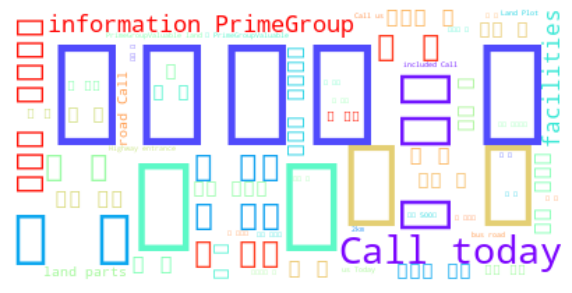

In [14]:
# merge all texts in posts
post_text = ' '.join(df_posts['text'])
post_text = post_text.replace('\n', '') # remove blank lines characters

# update stopwords
stopwords = set(STOPWORDS)
stopwords.update(['https', 'gov', 'au', 'nsw', 's', 're'])

# Generate a word cloud image
wordcloud = WordCloud(random_state=1, 
                      collocations=True, 
                      stopwords=stopwords,
                      max_words=60,
                      background_color='white',
                      colormap ='rainbow',
                      contour_color='steelblue').generate(post_text)

# Function to display word cloud img via matplotlib
def plot_cloud(wordcloud):
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')

# plot world cloud    
plot_cloud(wordcloud)

In [15]:
# list of common products / services
products = ['bus road', 'primegroup', 'highway entrance', 'land parts', 'facilities', 
            'information', 'real estate', 'call us', 'lk', 'call today']

# Load the SpaCy model
nlp = spacy.load("en_core_web_sm")

# Create the PhraseMatcher object. The tokenizer is the first argument. Use attr = 'LOWER' to make consistent capitalization
matcher = PhraseMatcher(nlp.vocab, attr='LOWER')

# Only run nlp.make_doc to speed things up
prod_tokens = [nlp.make_doc(text) for text in products]

# Add the item patterns to the matcher
matcher.add("HomeLandsTopics", prod_tokens)

In [16]:
# Use defaultdict to create dictionary of sentiment scores by product
# If a key doesn't exist in item_ratings, the key is added with an empty list as the value.
product_sentiment = defaultdict(list)
product_likes = defaultdict(list)

# add sentiment scores from posts to each product
for idx, post in df_posts.iterrows():
    doc = nlp(post.loc['text'])
    
    # Using the matcher created before
    matches = matcher(doc)
    
    # Create a set of the items found in the review text
    found_products = set()
    for match_id, start, end in matches:
        product = doc[start:end].text.lower() # remove case sensitives
        found_products.add(product)
    
    # add sentiment scores to each products found in post
    for product in found_products:
        product_sentiment[product].append(post.sentiment)
        product_likes[product].append(post.likes)

<AxesSubplot:ylabel='Sentiment score'>

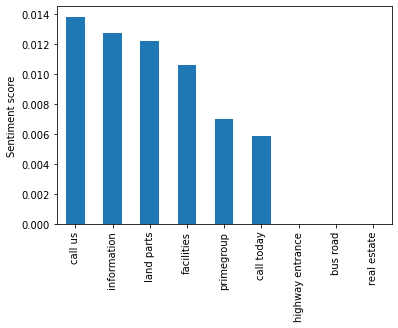

In [17]:
# Calculate the mean sentiment score for each product
mean_sentiment = {}

for product, score in product_sentiment.items():
    avg_score = sum(score) / len(score)
    mean_sentiment[product] = avg_score

# create dataframe for sentiment scores by product    
df_prod_sentiment = pd.DataFrame(mean_sentiment, index=['sentiment']).transpose()
df_prod_sentiment = df_prod_sentiment.sort_values(by=['sentiment'], ascending=False)

# plot sentiment score by products
df_prod_sentiment.plot(kind='bar', legend=False, ylabel='Sentiment score')

<AxesSubplot:ylabel='Number of Likes'>

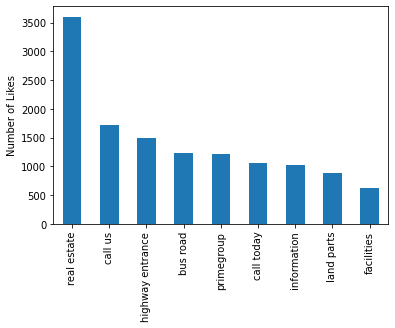

In [18]:
# Calculate the avg number of likes  for each product
mean_likes = {}

for product, likes in product_likes.items():
    avg_likes = sum(likes) / len(likes)
    mean_likes[product] = avg_likes

# create dataframe for sentiment scores by product    
df_prod_likes = pd.DataFrame(mean_likes, index=['likes']).transpose()
df_prod_likes = df_prod_likes.sort_values(by=['likes'], ascending=False)

# plot sentiment score by products
df_prod_likes.plot(kind='bar', legend=False, ylabel='Number of Likes')

In [19]:
df_posts_new = df_posts # create a new df to incorporate new features

# create df for product term counts by FB posts
df_product_terms = pd.DataFrame(columns=products, index=df_posts_new.index)
df_product_terms.fillna(0, inplace=True) # remove NA in order to add increments

# count product term matches for each posts
for idx, post in df_posts_new.iterrows():
    doc = nlp(post.loc['text'])
    
    # Using the matcher created before
    matches = matcher(doc)
    
    # Create a set of the items found in the review text
    for match_id, start, end in matches:
        product = doc[start:end].text.lower() # remove case sensitives
        df_product_terms.loc[idx, product] += 1

In [20]:
# add product term counts to df
df_posts_new = df_posts_new.join(df_product_terms)

# predictors and target variable
features = ['likes', 'comments', 'shares'] + products
X = df_posts_new[features]
y = df_posts_new['sentiment']

# fit OLS model using statmodels api
X = sm.add_constant(X, prepend=False) # add constant term
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              sentiment   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                 -0.099
Method:                 Least Squares   F-statistic:                    0.3028
Date:                Sat, 23 Jul 2022   Prob (F-statistic):              0.987
Time:                        14:41:27   Log-Likelihood:                 158.29
No. Observations:                  94   AIC:                            -290.6
Df Residuals:                      81   BIC:                            -257.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
likes            -6.364e-07   5.14e-06  